In [2]:
import sys
import pandas as pd
import numpy as np
import mglearn
import sklearn
import matplotlib.pyplot as plt

# Binning, Discretization, Linear Models, and Trees
- the best way to represent data is dependent on the kind of model you are using
    - For example, linear models and tree-based models have very different properties when it comes to how they work with different feature representations



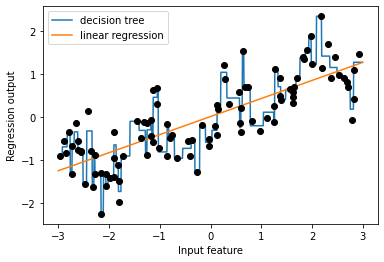

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label= "decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [4]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [5]:
# record for each data point which bin it falls into using np.digitize function
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points: \n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [6]:
from sklearn.preprocessing import OneHotEncoder
#transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encodedr.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print("X_binned.shape: {}".format(X_binned.shape))



[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

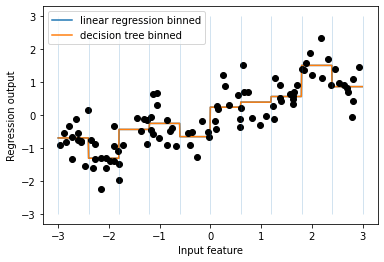

In [7]:
# build linear regression model and a new decision tree model on the one-hot-encoded data
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- linear regression became more flexible, while the decision tree is less flexible due to the binning. 
- Binning features typically has no beneficial effect for tree-based models, as these models can already split the data anywhere
    - Binning is done on a single feature, while tree-based models will look at multiple features at once
- if there are good reasons to use a linear model for a particular dataset (very large, high-dimensional), but some features have nonlinear relations with the output - binning can be a great way to increase modeling power
